In [32]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, re
from sklearn.model_selection import train_test_split
import keras

In [33]:
from keras.preprocessing.text import Tokenizer

In [34]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [35]:
df = pd.read_excel('predicted_unsupervised_sentiment.xlsx')
display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...
6647,6647,NaN,NaN,আমি কখনো আশা করিনি যে আমি আমার স্বপ্নের প্রিয় ...,1
6648,6648,NaN,NaN,মিডিয়া লিটনকে একজন খারাপ মানুষ হিসেবে প্রতিষ্ঠ...,0
6649,6649,NaN,NaN,বাংলাদেশের জন্ম কিংবা তার পূর্বের ইতিহাস অনেকে...,0
6650,6650,NaN,NaN,আপনারা সিম নিবন্দন করালেন বাংলাদেশে অপরাধ কমবে...,0


## Data exploration and processing

In [36]:
df.shape

(6652, 5)

In [37]:
# Display general information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Display the number of rows and columns in the DataFrame
print("\nDataFrame Shape:")
print(df.shape)

# Display the total number of elements in the DataFrame
print("\nDataFrame Size:")
print(df.size)

# Display descriptive statistics of the DataFrame
print("\nDataFrame Descriptive Statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6652 entries, 0 to 6651
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6652 non-null   int64  
 1   Unnamed: 1  0 non-null      float64
 2   Unnamed: 2  0 non-null      float64
 3   sentence    6652 non-null   object 
 4   sentiment   6652 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 260.0+ KB
None

DataFrame Shape:
(6652, 5)

DataFrame Size:
33260

DataFrame Descriptive Statistics:
        Unnamed: 0  Unnamed: 1  Unnamed: 2    sentiment
count  6652.000000         0.0         0.0  6652.000000
mean   3325.500000         NaN         NaN     0.456554
std    1920.411327         NaN         NaN     0.498146
min       0.000000         NaN         NaN     0.000000
25%    1662.750000         NaN         NaN     0.000000
50%    3325.500000         NaN         NaN     0.000000
75%    4988.250000         NaN       

In [38]:
df['sentiment'].value_counts()

0    3615
1    3037
Name: sentiment, dtype: int64

In [39]:
df.reset_index(drop=True, inplace=True)
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x)))

In [40]:
# data1 =pd.read_excel('stopwords_bangla.xlsx')
# stop = data1['words'].tolist()

In [41]:
# def stopwordRemoval(text):
#     x=str(text)
#     l=x.split()

#     stm=[elem for elem in l if elem not in stop]

#     out=' '.join(stm)

#     return str(out)

In [42]:
# df['sentence'] = df.sentence.apply(lambda x: stopwordRemoval(str(x)))

>Now I will prepare the dataset to train in the CNN LSTM network.
So I have to convert all Sentences into a numpy Array.
I have divided the training and testing data into an 80/20 ratio.
I have converted the sentiment values into one-hot encodings for convenient use in model training.

In [43]:
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
training_sentences = []
testing_sentences = []

train_sentences=train1['sentence'].values
train_labels=train1['sentiment'].values
for i in range(train_sentences.shape[0]):
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)

training_sentences=np.array(training_sentences)

In [44]:
test_sentences=test1['sentence'].values
test_labels=test1['sentiment'].values

for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    testing_sentences.append(x)

testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.to_categorical(train_labels)


test_labels=keras.utils.to_categorical(test_labels)

In [45]:
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 5321
Testing Set Length: 1331
training_sentences shape: (5321,)
testing_sentences shape: (1331,)
train_labels shape: (5321, 2)
test_labels shape: (1331, 2)


In [46]:
training_sentences[3]

'টাকা কি গাছে ধরে'

In [47]:
train_labels[3]

array([1., 0.], dtype=float32)

In [48]:
print(training_sentences.shape)
print(train_labels.shape)

(5321,)
(5321, 2)


In [49]:
vocab_size = 20000
embedding_dim = 300
max_length = 150
trunc_type='post'
oov_tok = "<OOV>"

**Tokenize**

In [50]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))

18247


In [51]:
from keras.preprocessing.sequence import pad_sequences

In [52]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

In [53]:
print("Sentence :--> \n")
print(training_sentences[3]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[3])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

টাকা কি গাছে ধরে

Sentence Tokenized and Converted into Sequence :--> 

[14, 7, 1157, 158]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  263 4331 6803  108  473  602  317  439    2]


In [54]:
# from sklearn.preprocessing import MinMaxScaler

# # Create an instance of MinMaxScaler
# scaler = MinMaxScaler()

# # Reshape the padded sequences to a 2D array for scaling
# padded_2d = padded.reshape(padded.shape[0], -1)

# # Fit the scaler on the training data
# scaler.fit(padded_2d)

# # Scale the training and testing data
# scaled_padded = scaler.transform(padded_2d)
# scaled_testing_padded = scaler.transform(testing_padded.reshape(testing_padded.shape[0], -1))

# # Reshape the scaled data back to the original shape
# scaled_padded = scaled_padded.reshape(padded.shape)
# scaled_testing_padded = scaled_testing_padded.reshape(testing_padded.shape)

In [55]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5321, 150)
Padded shape(testing): (1331, 150)


**model selection**

In [56]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dropout, Dense, Bidirectional, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [57]:
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(128, kernel_size=3, activation="relu"))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='sigmoid'))
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 300)          6000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 148, 128)          115328    
                                                                 
 bidirectional_2 (Bidirecti  (None, 148, 256)          263168    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 148, 256)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 64)               

In [58]:
history=model.fit(padded,train_labels,epochs=50,batch_size=256,
                  validation_data=(testing_padded,test_labels),
                  use_multiprocessing=True, workers=8)

Epoch 1/50
21/21 [==============================] - 13s 238ms/step - loss: 1.1747 - accuracy: 0.5405 - val_loss: 1.1655 - val_accuracy: 0.5470
Epoch 2/50
21/21 [==============================] - 3s 151ms/step - loss: 1.1569 - accuracy: 0.5685 - val_loss: 1.1445 - val_accuracy: 0.6071
Epoch 3/50
21/21 [==============================] - 4s 198ms/step - loss: 1.1352 - accuracy: 0.5884 - val_loss: 1.1153 - val_accuracy: 0.6123
Epoch 4/50
21/21 [==============================] - 4s 183ms/step - loss: 1.1031 - accuracy: 0.6048 - val_loss: 1.0761 - val_accuracy: 0.6334
Epoch 5/50
21/21 [==============================] - 3s 155ms/step - loss: 1.0236 - accuracy: 0.6916 - val_loss: 0.9636 - val_accuracy: 0.7483
Epoch 6/50
21/21 [==============================] - 3s 138ms/step - loss: 0.7834 - accuracy: 0.8752 - val_loss: 0.8357 - val_accuracy: 0.8219
Epoch 7/50
21/21 [==============================] - 4s 177ms/step - loss: 0.6117 - accuracy: 0.9384 - val_loss: 0.8446 - val_accuracy: 0.8355
Epoch

In [59]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


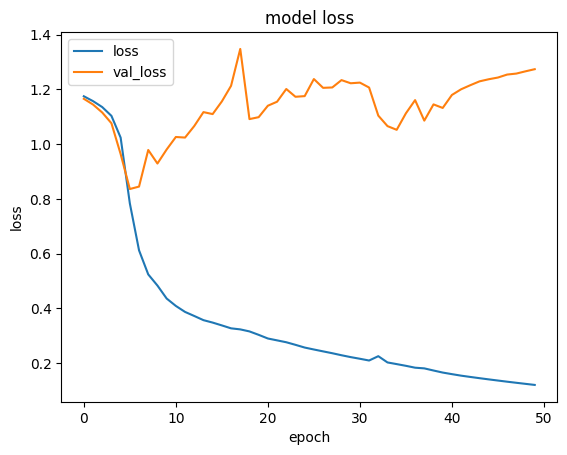

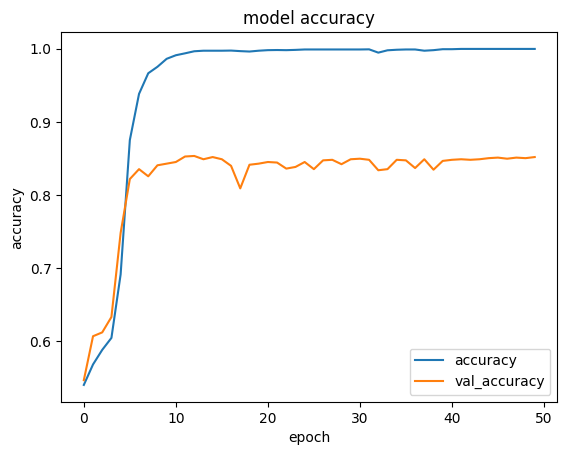

In [60]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [61]:
#accuracy calculation
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

21/21 [==============================] - 1s 34ms/step - loss: 0.1173 - accuracy: 0.9998
The train accuracy is: 0.9998120665550232
6/6 [==============================] - 0s 28ms/step - loss: 1.2736 - accuracy: 0.8520
The test accuracy is: 0.8519909977912903
